In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv.imread('images/DIP.png', 0)

In [3]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

In [4]:
magnitude_spectrum = 20 * np.log(np.abs(fshift))
rows, cols = img.shape
center_row, center_col = rows // 2, cols // 2

In [5]:
fshift = np.flip(fshift)

In [6]:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

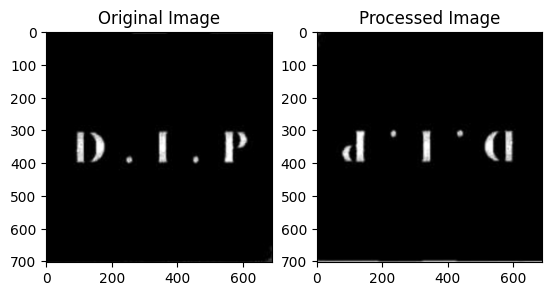

In [7]:
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(img_back, cmap='gray'), plt.title('Processed Image')
plt.show()

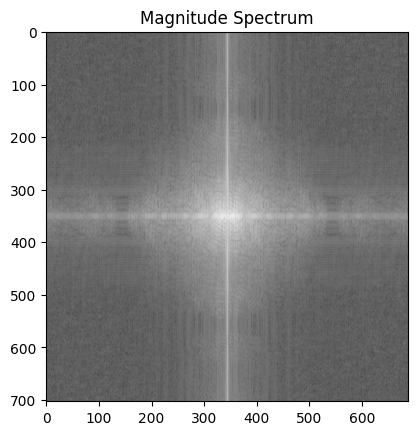

In [8]:
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.show()


In [9]:

# توضیحات مراحل انجام کد:
# 1. تصویر اصلی خوانده می‌شود و به صورت سیاه و سفید ذخیره می‌شود تا پردازش ساده‌تر شود.
# 2. ماتریسی از صفرها به اندازه تصویر ایجاد می‌گردد.
# 3. فیلتر لاپلاس به صورت یک ماتریس کوچک تعریف می‌شود که برای برجسته‌سازی لبه‌ها کاربرد دارد.
# 4. فیلتر لاپلاس در گوشه بالای چپ ماتریس صفر جایگذاری می‌شود.
# 5. تبدیل فوریه روی ماتریس حاوی فیلتر لاپلاس اعمال می‌شود تا فیلتر به حوزه فرکانس منتقل شود.
# 6. تبدیل فوریه 2بعدی روی تصویر اصلی اعمال می‌شود.
# 7. حاصل ضرب نقطه‌ای بین تبدیل فوریه تصویر و فیلتر در حوزه فرکانس انجام می‌شود.
# 8. تبدیل فوریه معکوس روی حاصل ضرب اعمال می‌شود تا تصویر پردازش‌شده به حوزه مکان بازگردانده شود.
# 9. مقدار مطلق تصویر پردازش‌شده گرفته می‌شود تا تنها بخش حقیقی باقی بماند.
# 10. نتایج شامل تصویر اصلی، تبدیل فوریه فیلتر، و تصویر نهایی پردازش‌شده نمایش داده می‌شود و تصویر نهایی ذخیره می‌شود.
